In [1]:
from tensorflow.keras import (datasets, models, layers)
import matplotlib.pyplot as plt

In [2]:
fmnist = datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [38]:
model=models.Sequential([
    layers.Input((28,28, 1)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

model.fit(x_train, y_train, epochs=10)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2704)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               346240    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
________________________________________________

## Display features of the first two layers (Conv2D & MaxPool2D)

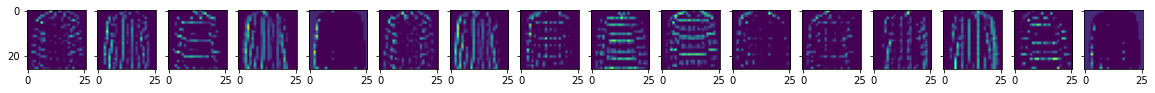

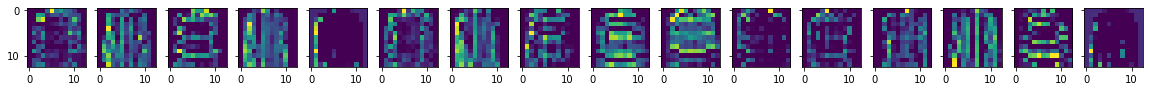

In [99]:
img_idx = 7

outputs = [layer.output for layer in model.layers]
model1 = models.Model(inputs = model.input, outputs = outputs)

feature_maps=model1.predict(x_test[img_idx].reshape(1,28,28,1))

for feature_map in feature_maps:
  # only consider Conv2D and MaxPool2D layers
  # their outputs have 4 dimensions
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]

    fig, axs = plt.subplots(1, n_features, figsize=(20, 4))
    for i in range(n_features):
      axs[i].label_outer()
      axs[i].imshow(feature_map[0, :, :, i])